# Comparison of Sampling Techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from fairpair import *

In [2]:
# Generate a new Graph to test sampling
G = FairPairGraph()
G.generate_groups(400, 200) # same size groups
G.assign_skills(loc=0, scale=0.86142674, seed=42) # general skill distribution
#G.assign_bias(nodes=G.minority_nodes, loc=-1.43574282, scale=0.43071336, seed=42) # add bias to unprivileged group

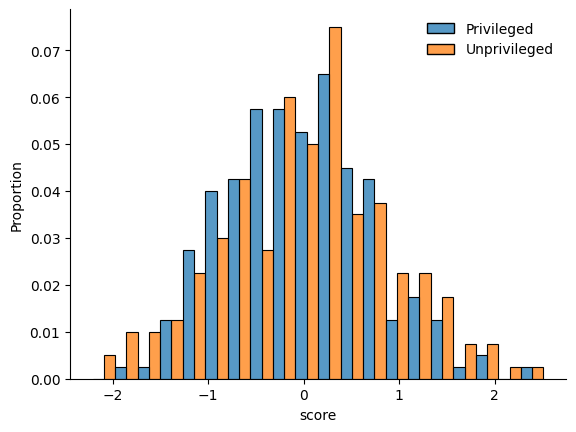

In [3]:
df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
ax = sns.histplot(data=df, x='score', hue='minority', stat='proportion', bins=20, multiple='dodge')
ax.legend(ax.get_legend().legend_handles, ['Privileged', 'Unprivileged'], title=None, frameon=False)
sns.despine()
plt.savefig('./plots/score_distribution_withoutBias.png', dpi=150, bbox_inches="tight")

## Random Sampling

In [4]:
F = G.copy()
sampling = RandomSampling(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time(save_to='./plots/comparisons_randomSampling_withoutBias.png')
sampling.plot_success_over_time(save_to='./plots/sucess_randomSampling_withoutBias.png')

minority comparisons: 3943
majority comparisons: 4057
minority success rate: 0.51
majority success rate: 0.49


## ProbKnockout Sampling

In [5]:
F = G.copy()
sampling = ProbKnockoutSampling(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1, min_prob=0.1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time(save_to='./plots/comparisons_probKnockout_withoutBias.png')
sampling.plot_success_over_time(save_to='./plots/success_probKnockout_withoutBias.png')

minority comparisons: 3948
majority comparisons: 4052
minority success rate: 0.43
majority success rate: 0.4


## GroupKnockout Sampling

In [6]:
F = G.copy()
sampling = GroupKnockoutSampling(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time(save_to='./plots/comparisons_groupKnockout_withoutBias.png')
sampling.plot_success_over_time(save_to='./plots/success_groupKnockout_withoutBias.png')

minority comparisons: 4066
majority comparisons: 3934
minority success rate: 0.51
majority success rate: 0.5


## OversampleMinority

In [7]:
F = G.copy()
sampling = OversampleMinority(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1, p=0.75)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time(save_to='./plots/comparisons_oversampleMinority_withoutBias.png')
sampling.plot_success_over_time(save_to='./plots/success_oversampleMinority_withoutBias.png')

minority comparisons: 6000
majority comparisons: 2000
minority success rate: 0.5
majority success rate: 0.51


## Rank-Based Sampling

In [8]:
F = G.copy()
sampling = RankSampling(F, log_comparisons=True, log_success=True, warn=False)
ranker = RankRecovery(F)
ranking = None
for i in range(100):
    sampling.apply(iter=1, k=1, ranking=ranking)
    if nx.is_strongly_connected(F):
        ranking, other_nodes = ranker.apply(rank_using=rankCentrality)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time(save_to='./plots/comparisons_rankSampling_withoutBias.png')
sampling.plot_success_over_time(save_to='./plots/success_rankSampling_withoutBias.png')

minority comparisons: 4024
majority comparisons: 3976
minority success rate: 0.4
majority success rate: 0.39
